In [88]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import numpy as np

In [192]:
xs, ys = make_moons(n_samples=500, noise=0.3)
ys[ys==0] = -1

In [193]:
def plot_data(xs, ys):
    plt.plot(xs[:,0][ys>0], xs[:,1][ys>0], '.b')
    plt.plot(xs[:,0][ys<0], xs[:,1][ys<0], '.r')

In [201]:
class Perceptron:
    def __init__(self, cx, cy, angle):
        self.cx = cx
        self.cy = cy
        self.angle = angle
    
    def classify_single(self, x1, x2):
        return 1. if (x1-self.cx)*np.cos(self.angle) + (x2-self.cy)*np.sin(self.angle) > 0 else -1.
    
    def classify(self, xs):
        shift_x = xs[:, 0] - self.cx
        shift_y = xs[:, 1] - self.cy
        
        dot = shift_x*np.cos(self.angle) + shift_y*np.sin(self.angle)
        tmp = np.zeros_like(dot, dtype=float)
        tmp[dot>0] = 1.
        tmp[dot<=0] = -1.
        return tmp
    
    def line(self, tmin=-1, tmax=1):
        ts = np.linspace(tmin, tmax, 100)
        xs = self.cx + ts*np.cos(self.angle+np.pi/2)
        ys = self.cy + ts*np.sin(self.angle+np.pi/2)
        return xs, ys
    
    def plot_line(self):
        lxs, lys = self.line()
        plt.plot(lxs, lys)
    
    def exp_loss(self, xs, ys):
        got = self.classify(xs)
        return np.sum(np.exp(-ys*got))
        
def random_classifier():
    cx = np.random.random()*5 - 2.5
    cy = np.random.random()*3 - 1.5
    angle = np.random.random()*2*np.pi
    return Perceptron(cx = cx, cy=cy, angle=angle)

In [202]:
class ADABoost:
    def __init__(self, alphas, classifiers):
        self.alphas = alphas
        self.classifiers = classifiers
    
    def classify_single(self, x1, x2):
        return np.sum([alpha*clf.classify_single(x1, x2) for alpha, clf in zip(self.alphas, self.classifiers)])
    
    def classify(self, xs):
        s = np.zeros(len(xs))
        for alpha, clsf in zip(self.alphas, self.classifiers):
            s+= alpha*clsf.classify(xs)
        return s
    
    def append_classifier(self, classifier, alpha):
        self.alphas.append(alpha)
        self.classifiers.append(classifier)
    
    
    def truncate(self, n):
        return AdaBoost(classifiers=classifiers[:n], alphas=alphas[:n])
    
    def grid_plot(self, xlim, ylim):
        xmin, xmax = xlim
        ymin, ymax = ylim
        
        xs = np.linspace(xmin, xmax, 100)
        ys = np.linspace(ymin, ymax, 100)
        xgrid, ygrid = np.meshgrid(xs, ys)
        
        vclassify = np.vectorize(self.classify_single)
        z = vclassify(xgrid, ygrid)
        print(z)
        plt.contourf(xs, ys, z, cmap='bwr_r')
    
    def exp_loss(self, xs, ys):
        return np.exp(-ys*self.classify(xs))
    
    @classmethod
    def empty(cls):
        return ADABoost([], [])
    
    @classmethod
    def build_ada(cls, xs, ys, classifiers, n=10):
        tmp = ADABoost.empty()
        first_classifier = min(classifiers, key= lambda x: x.exp_loss(xs, ys))
        tmp.append_classifier(first_classifier, 1.)
        
        for i in range(n):
            w = tmp.exp_loss(xs,ys)
            def classifier_score(clf):
                guesses = clf.classify(xs)
                wrong_guesses = guesses != ys
                return sum(w[wrong_guesses])
            best_classifier = min(classifiers, key=classifier_score)
            error_rate = classifier_score(best_classifier)/np.sum(w)
            tmp.append_classifier(best_classifier, 1/2*np.log((1-error_rate)/error_rate))
            print(np.sum(tmp.exp_loss(xs, ys)))
        return tmp
            
            
        

In [203]:
np.random.seed(100)
classifiers = [random_classifier() for _ in range(1000)]
ada = ADABoost.build_ada(xs, ys, classifiers =  classifiers, n=50)

336.95195648115265
315.7664565564937
287.6771743456327
271.8435655059032
258.14612632052194
241.92714383818114
229.74353125431543
222.20335620542033
215.00646664475528
211.09973359033495
204.3275723280749
199.7509763615136
193.8038055072979
189.53355407772858
185.41212962708119
180.6995143862181
177.23361388995784
172.86129319288932
170.32193589879353
166.9995330813001
165.0987222782358
162.5271348979182
159.85258126159644
158.41720681237325
157.17369086890872
155.37614032477973
153.5149864833196
152.4563443144495
150.93319225936335
149.6285399057327
147.9565778490508
146.9337762802494
145.9178912658288
145.14909218555482
144.269870938728
143.42321631582615
142.3920011795877
140.9542485934092
139.8362337977559
138.9169710537923
137.98613536715695
137.19404485693434
136.59790987609387
135.8124921709735
135.01792207890747
134.37337063247298
133.8309866331144
133.2184940258934
132.4304040306295
131.96575629845793


In [204]:
np.exp(-1)*500

183.93972058572118

[[-0.23042203 -0.23042203 -0.23042203 ...  4.1563395   4.1563395
   3.60935923]
 [-0.23042203 -0.23042203 -0.23042203 ...  4.1563395   3.60935923
   3.60935923]
 [-0.23042203 -0.23042203 -0.23042203 ...  3.60935923  3.60935923
   3.60935923]
 ...
 [-4.1563395  -4.1563395  -4.1563395  ...  0.87892282  0.87892282
   0.87892282]
 [-4.1563395  -4.1563395  -4.1563395  ...  0.87892282  0.87892282
   0.87892282]
 [-4.1563395  -4.1563395  -4.1563395  ...  0.87892282  0.87892282
   0.87892282]]


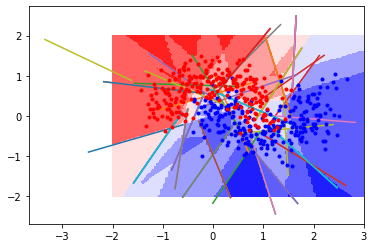

In [205]:
for clf in ada.classifiers:
    clf.plot_line()
plot_data(xs, ys)
ada.grid_plot((-2,3),(-2,2))

In [199]:
guess = 1*(ada.classify(xs) > 0)*2 - 1


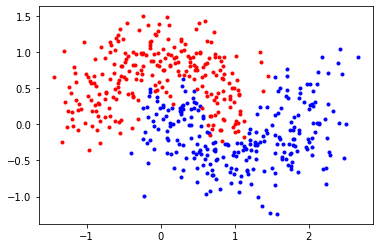

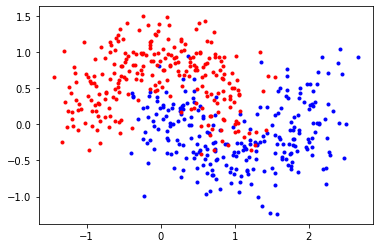

In [200]:
plot_data(xs, guess)
plt.figure()
plot_data(xs, ys)

In [94]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [95]:
s = random_classifier()

330.45318907739596 0.14952910391565677 0.06073951434912206


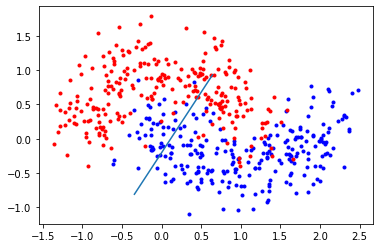

In [96]:
plot_data(xs,ys)
lxs, lys = s.line()
plt.plot(lxs, lys)

print(s.angle*180/np.pi, s.cx, s.cy)

In [97]:
s.angle=s.angle + np.pi
guess = s.classify(xs)

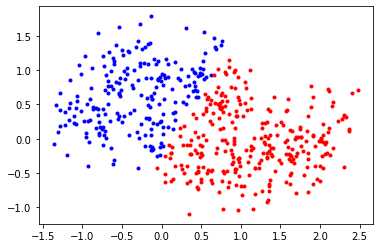

In [98]:
plot_data(xs,guess)